# Load modules

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import halo_data as hd

# Load data

In [2]:
#data = hd.getdata("C:/Users/LV/OneDrive - University of Helsinki/FMI/halo/53/depolarization/")
# data = hd.getdata("G:/OneDrive - University of Helsinki/FMI/halo/53/depolarization/")
data = hd.getdata(r'G:\OneDrive - University of Helsinki\FMI\halo\53\depolarization')

Rerun start from this cell to get new data file

In [3]:
file_name = next(data)
df = hd.halo_data(file_name)

# Data exploration

In [4]:
# Info of data
df.info

{'num_pulses_m1': 105000.0,
 'num_pulses_averaged': 1050000.0,
 'num_lags': 0.0,
 'num_samples_gate': 10.0,
 'lens_diameter': 0.05999999865889549,
 'divergence': 3.300000025774352e-05,
 'focus': 2000.0,
 'energy': 9.999999747378752e-06,
 'wavelength': 1.500000053056283e-06,
 'prf': 15000.0,
 'pulse_length': 2.0000000233721948e-07,
 'bandwidth': 50000000.0,
 'latitude': 62.737998962402344,
 'longitude': 27.542999267578125,
 'altitude': 190.0,
 'elevation': 89.94999694824219,
 'azimuth': 90.0}

In [5]:
# More info
df.more_info

OrderedDict([('system', b'Halo Photonics pulsed Doppler lidar'),
             ('location', b'Vehmasmaki'),
             ('source', b'Vehmasmaki 1.5 micron Doppler Lidar'),
             ('title', b'Vehmasmaki 1.5 micron Doppler Lidar'),
             ('day', 1.0),
             ('month', 1.0),
             ('year', 2016.0),
             ('scantype', b'FIX'),
             ('systemID', 53.0),
             ('history',
              b"NetCDF generated from original data Sat Jan  2 04:06:49 2016 by Ewan O'Connor <e.j.oconnor@reading.ac.uk> on lidar.fmi.fi"),
             ('command_line',
              b'/home/users/oconnor/bin/dopplerlidar2nc -location Vehmasmaki 62.738 27.543 190 -noisethreshold 1.008 -user "Ewan O\'Connor <e.j.oconnor@reading.ac.uk>" -prefix /home/users/oconnor/data/fmi/uncalibrated/halo-doppler-lidar-53-co/2016 Stare_53_20160101_00.hpl Stare_53_20160101_01.hpl Stare_53_20160101_02.hpl Stare_53_20160101_03.hpl Stare_53_20160101_04.hpl Stare_53_20160101_05.hpl Stare_53_201601

In [6]:
# Get meta data of each variable
df.meta_data('co_signal')

# Get meta data of all variables
{'==>' + key: df.meta_data(key) for key in df.full_data_names}

# Only crucial info
{'==>' + key: df.meta_data(key)['_attributes'] for key in df.full_data_names}

{'==>num_pulses_m1': OrderedDict([('units', b' '),
              ('long_name', b'Number of pulses per ray in mode 1')]),
 '==>num_pulses_averaged': OrderedDict([('units', b' '),
              ('long_name', b'Number of pulses per ray in averaged fields')]),
 '==>num_lags': OrderedDict([('units', b' '),
              ('long_name',
               b'Number of lags used in evaluating the complex autocorrelation function')]),
 '==>num_samples_gate': OrderedDict([('units', b' '),
              ('long_name', b'Number of samples (points) per gate')]),
 '==>lens_diameter': OrderedDict([('units', b'm'),
              ('long_name', b'diameter of lens')]),
 '==>divergence': OrderedDict([('units', b'rad'),
              ('long_name', b'divergence of beam')]),
 '==>focus': OrderedDict([('units', b'm'), ('long_name', b'Focus range')]),
 '==>energy': OrderedDict([('units', b'J'), ('long_name', b'laser energy')]),
 '==>wavelength': OrderedDict([('units', b'm'),
              ('long_name', b'laser wavele

In [7]:
# Data
df.data

{'range': array([  15.,   45.,   75.,  105.,  135.,  165.,  195.,  225.,  255.,
         285.,  315.,  345.,  375.,  405.,  435.,  465.,  495.,  525.,
         555.,  585.,  615.,  645.,  675.,  705.,  735.,  765.,  795.,
         825.,  855.,  885.,  915.,  945.,  975., 1005., 1035., 1065.,
        1095., 1125., 1155., 1185., 1215., 1245., 1275., 1305., 1335.,
        1365., 1395., 1425., 1455., 1485., 1515., 1545., 1575., 1605.,
        1635., 1665., 1695., 1725., 1755., 1785., 1815., 1845., 1875.,
        1905., 1935., 1965., 1995., 2025., 2055., 2085., 2115., 2145.,
        2175., 2205., 2235., 2265., 2295., 2325., 2355., 2385., 2415.,
        2445., 2475., 2505., 2535., 2565., 2595., 2625., 2655., 2685.,
        2715., 2745., 2775., 2805., 2835., 2865., 2895., 2925., 2955.,
        2985., 3015., 3045., 3075., 3105., 3135., 3165., 3195., 3225.,
        3255., 3285., 3315., 3345., 3375., 3405., 3435., 3465., 3495.,
        3525., 3555., 3585., 3615., 3645., 3675., 3705., 3735., 3765

In [8]:
# Names of data
df.data_names

['range',
 'time',
 'time_averaged',
 'beta_raw',
 'v_raw',
 'v_error',
 'co_signal',
 'cross_signal',
 'depo_raw',
 'co_signal_averaged',
 'cross_signal_averaged',
 'depo_averaged_raw']

# Change masking missing values from -999 to NaN

In [9]:
df.unmask999()

In [10]:
# Overview of data
df.describe()

,beta_raw,v_raw,v_error,co_signal,cross_signal,depo_raw,co_signal_averaged,cross_signal_averaged,depo_averaged_raw
count,1.705e+06,1.705e+06,8.4472e+05,1.705e+06,1.6765e+06,1.6765e+06,1.5296e+05,1.5153e+05,1.5153e+05
mean,1.0249e-06,-0.36737,0.67076,1.0764,1.0035,0.42494,-8.3017,1.0034,-0.0010609
std,1.1952e-05,4.0769,0.29452,0.90284,0.046953,626.4,96.381,0.043917,159.49
min,-1.0537e-05,-20.169,0.0036926,0.9002,0.74083,-1.5285e+05,-999,0.99816,-28074
25%,-2.9164e-07,-2.0524,0.49037,0.99915,0.99912,-0.92255,0.99974,0.99975,-0.9109
50%,1.3682e-08,-0.4471,0.68242,1.0001,1.0001,0.031225,1,1,0.03701
75%,4.2183e-07,1.3875,0.89492,1.0011,1.0011,0.92155,1.0003,1.0003,0.92803
95%,2.4815e-06,6.8912,1.1157,1.0036,1.0028,5.9944,1.0011,1.0009,5.9032
max,0.00036433,18.931,1.1819,27.626,5.0575,7.3152e+05,23.912,3.9126,25906
Missing values,0,0,8.6024e+05,0,28480,28480,0,1434,1434


# Plot data before filtering

C:\Users\VIET\Desktop\Git\Python\halo-lidar\halo_data.py:51: RuntimeWarning: invalid value encountered in log10
  val = np.log10(self.data.get(var)).transpose()


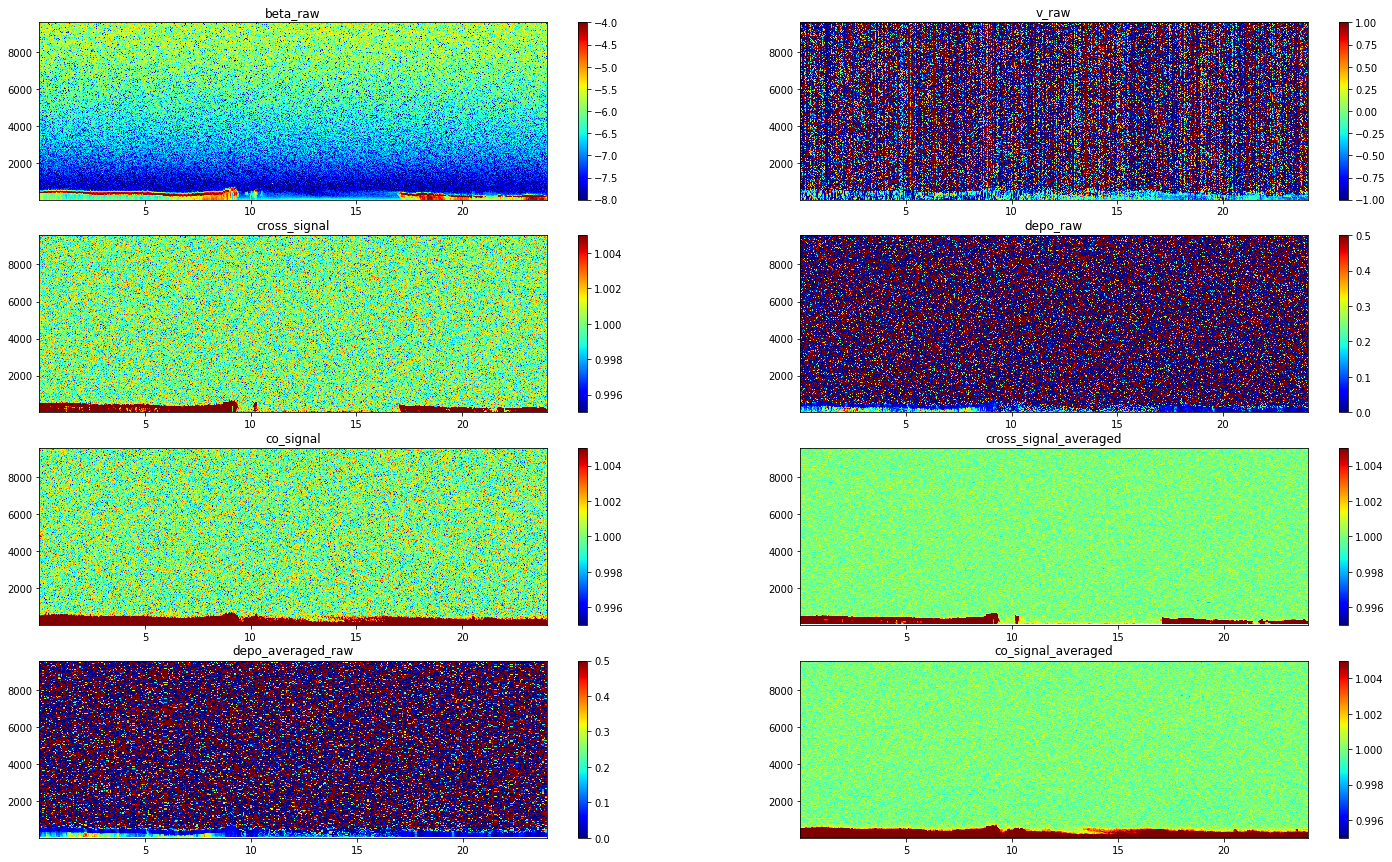

In [11]:
# Plot data
df.plot(
    variables=['beta_raw', 'v_raw', 'cross_signal', 'depo_raw', 'co_signal',
               'cross_signal_averaged', 'depo_averaged_raw', 'co_signal_averaged'],
    ncol=2, size=(25, 15))

# Filter data

Filter data variables based on co_signal with a threshold

In [12]:
df.filter(variables=['beta_raw', 'v_raw', 'cross_signal', 'depo_raw'],
          ref='co_signal', threshold=np.percentile(df.data['co_signal'], 99))

Filter data variables based on co_signal_averaged with a threshold

In [13]:
df.filter(variables=['cross_signal_averaged', 'depo_averaged_raw'],
          ref='co_signal_averaged', threshold=np.percentile(df.data['co_signal_averaged'], 99))

Overview of data after filtering

In [14]:
# Overview of data
df.describe()

,beta_raw,v_raw,v_error,co_signal,cross_signal,depo_raw,co_signal_averaged,cross_signal_averaged,depo_averaged_raw
count,17050,17050,8.4472e+05,1.705e+06,16771,16771,1.5296e+05,1530,1530
mean,9.451e-05,-0.42107,0.67076,1.0764,1.3099,0.04489,-8.3017,1.3017,0.043466
std,7.2544e-05,0.46744,0.29452,0.90284,0.34467,0.034371,96.381,0.31441,0.024741
min,1.5183e-05,-2.7403,0.0036926,0.9002,0.87053,-0.083854,-999,1.0098,0.0049389
25%,3.2023e-05,-0.6382,0.49037,0.99915,1.0846,0.025064,0.99974,1.0837,0.028354
50%,7.0657e-05,-0.4089,0.68242,1.0001,1.1894,0.039396,1,1.1915,0.041584
75%,0.00014619,-0.1796,0.89492,1.0011,1.419,0.055624,1.0003,1.4151,0.052716
95%,0.00023617,0.3555,1.1157,1.0036,1.9513,0.09711,1.0011,1.9026,0.08087
max,0.00036433,2.0372,1.1819,27.626,5.0575,0.56875,23.912,3.9126,0.37879
Missing values,1.6879e+06,1.6879e+06,8.6024e+05,0,1.6882e+06,1.6882e+06,0,1.5143e+05,1.5143e+05


# Plot data

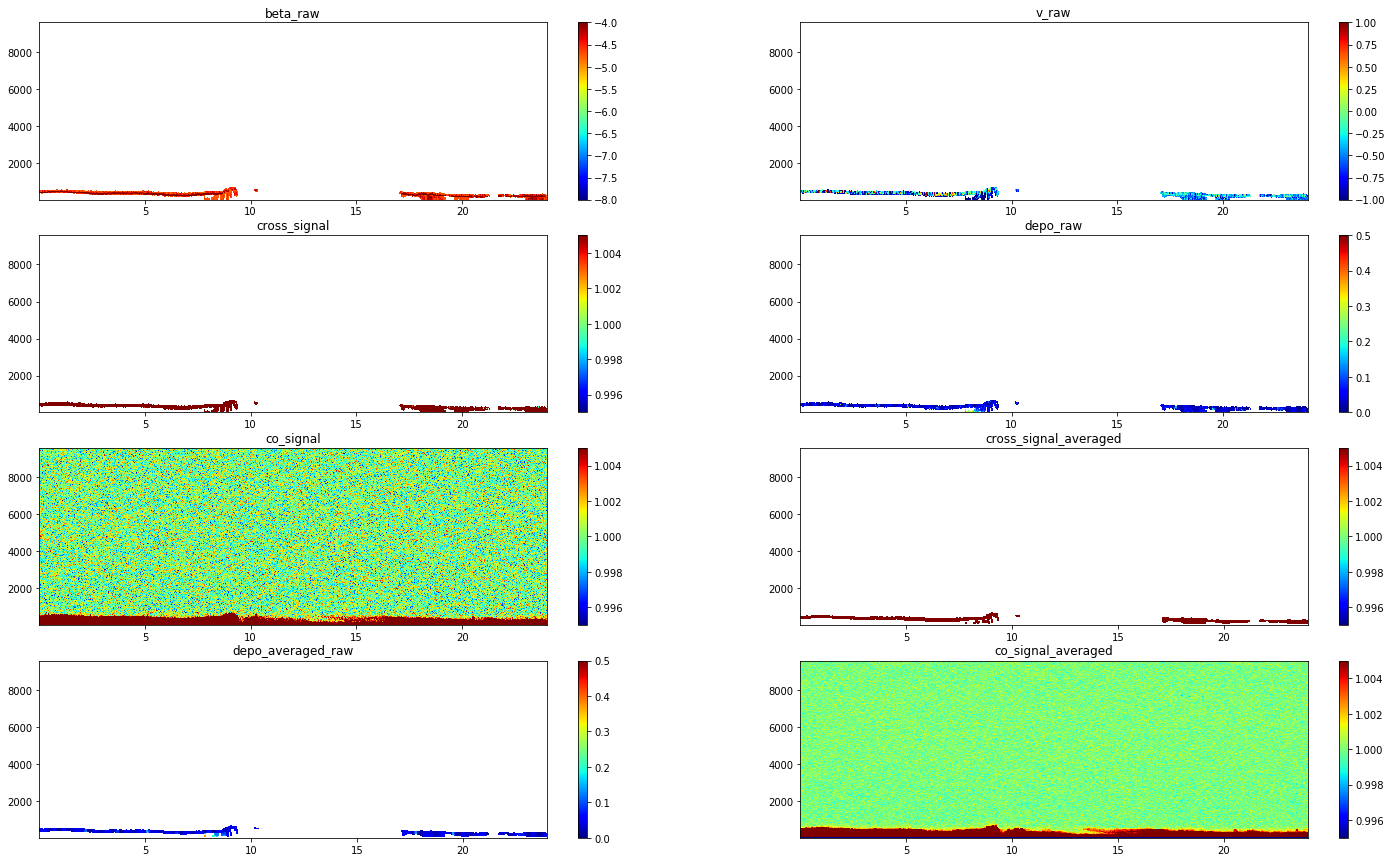

In [15]:
# Plot data
df.plot(
    variables=['beta_raw', 'v_raw', 'cross_signal', 'depo_raw', 'co_signal',
               'cross_signal_averaged', 'depo_averaged_raw', 'co_signal_averaged'],
    ncol=2, size=(25, 15))